In [488]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [489]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [490]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

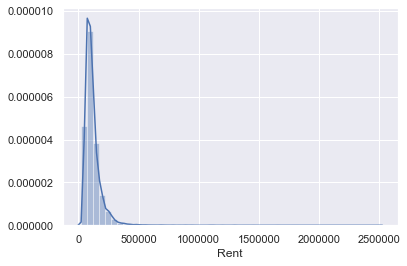

In [491]:
sns.distplot(train['Rent'])

In [492]:
train['Location'].value_counts()

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
                       ..
東京都江戸川区東葛西７丁目11-3       1
東京都荒川区東日暮里２丁目8番－1       1
東京都文京区本駒込１丁目28-14       1
東京都港区虎ノ門３丁目22-10        1
東京都目黒区緑が丘３丁目7-7         1
Name: Location, Length: 11333, dtype: int64

In [493]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [494]:
train['City'].value_counts()

世田谷区    3023
足立区     2191
大田区     2000
杉並区     1769
練馬区     1752
江戸川区    1702
板橋区     1624
港区      1513
江東区     1508
中央区     1279
品川区     1272
豊島区     1271
新宿区     1223
葛飾区     1212
中野区     1211
北区      1045
目黒区     1023
墨田区     1010
渋谷区      985
台東区      932
文京区      892
荒川区      576
千代田区     457
Name: City, dtype: int64

In [495]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)


,City,Rent
16,港区,214061.744878
4,千代田区,182706.236324
1,中央区,180887.865520
15,渋谷区,171839.786802
17,目黒区,145674.389052
10,新宿区,130573.957482
9,文京区,128562.070628
5,台東区,127625.944206
14,江東区,126217.110743
6,品川区,124609.473270


In [496]:
train['City'] = train['City'].replace('港区','Minato')
train['City'] = train['City'].replace('千代田区','Chiyoda')
train['City'] = train['City'].replace('中央区','Chuo')
train['City'] = train['City'].replace('渋谷区','Shibuya')
train['City'] = train['City'].replace('目黒区','Meguro')
train['City'] = train['City'].replace('新宿区','Shinjuku')
train['City'] = train['City'].replace('文京区','Bunkyo')
train['City'] = train['City'].replace('台東区','Taito')
train['City'] = train['City'].replace('江東区','Edo')
train['City'] = train['City'].replace('品川区','Shinagawa')
train['City'] = train['City'].replace('荒川区','Arakawa')
train['City'] = train['City'].replace('墨田区','Sumida')
train['City'] = train['City'].replace('世田谷区','Setagaya')
train['City'] = train['City'].replace('豊島区','Toshima')
train['City'] = train['City'].replace('大田区','Ota')
train['City'] = train['City'].replace('中野区','Nakano')
train['City'] = train['City'].replace('北区','Kita')
train['City'] = train['City'].replace('杉並区','Suginami')
train['City'] = train['City'].replace('練馬区','Nerima')
train['City'] = train['City'].replace('板橋区','Itabashi')
train['City'] = train['City'].replace('江戸川区','Edogawa')
train['City'] = train['City'].replace('足立区','Adachi')
train['City'] = train['City'].replace('葛飾区','Katsushika')

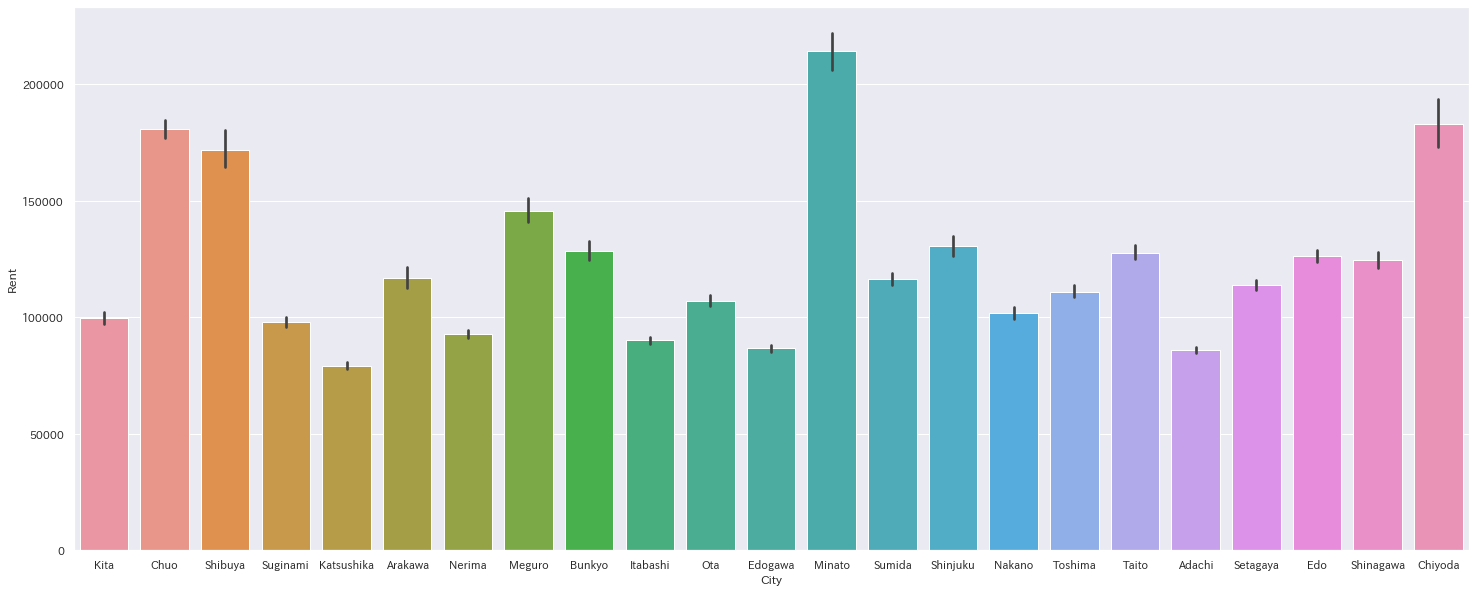

In [497]:
sns.set(font='IPAexGothic')
plt.figure(figsize=(25,10))
sns.barplot(x=train['City'],y=train['Rent'],data=train)

In [498]:
train['Type'].value_counts()

1K            11930
1R             5082
1LDK           4823
2LDK           2552
2DK            1909
1DK            1893
3LDK           1124
2K              920
3DK             419
1LDK+S(納戸)      238
2LDK+S(納戸)      157
4LDK            124
1K+S(納戸)         75
3LDK+S(納戸)       68
3K               48
2DK+S(納戸)        25
4DK              16
5LDK             15
1DK+S(納戸)        14
4LDK+S(納戸)       12
3DK+S(納戸)         6
4K                4
5LDK+S(納戸)        4
5DK               4
1LK+S(納戸)         2
6LDK              2
5K                1
5DK+S(納戸)         1
2K+S(納戸)          1
3K+S(納戸)          1
Name: Type, dtype: int64

In [499]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])')
    dataset['K'] = dataset['Type'].str.extract('(K)')
    dataset['L'] = dataset['Type'].str.extract('(L)')
    dataset['D'] = dataset['Type'].str.extract('(D)')
    dataset['S'] = dataset['Type'].str.extract('(S)')

In [500]:
K = train['K']

In [501]:
L = train['L']

In [502]:
D = train['D']

In [503]:
S = train['S']

In [504]:
#train[['R','K','L','D','S','Rent']].groupby(['R','K','L','D','S'], as_index=False).mean().sort_values(by="Rent",ascending=False)
train[['R','Rent']].groupby(['R'], as_index=False).mean().sort_values(by="Rent",ascending=False)

,R,Rent
5,6,350000.000000
4,5,330424.000000
3,4,281617.307692
2,3,195535.000000
1,2,147231.745687
0,1,104948.426653


In [505]:
#train['Type'].head(20)
train['K'] = train['K'].apply(lambda x: True if x == 'K' else False)

In [506]:

train['D'] = train['D'].apply(lambda x: True if x == 'D' else False)
train['L'] = train['L'].apply(lambda x: True if x == 'L' else False)
train['S'] = train['S'].apply(lambda x: True if x == 'S' else False)

In [507]:
train[['id','R','K','D','L','S']].groupby(['id','R'],as_index=False).mean().head(20)

,id,R,K,D,L,S
0,1,1,True,False,False,False
1,2,1,False,False,False,False
2,3,1,True,False,False,False
3,4,2,True,True,True,False
4,5,2,True,True,False,False
5,6,2,True,True,True,False
6,7,1,True,False,False,False
7,8,1,True,False,False,False
8,9,2,True,True,False,False
9,10,1,True,True,False,False


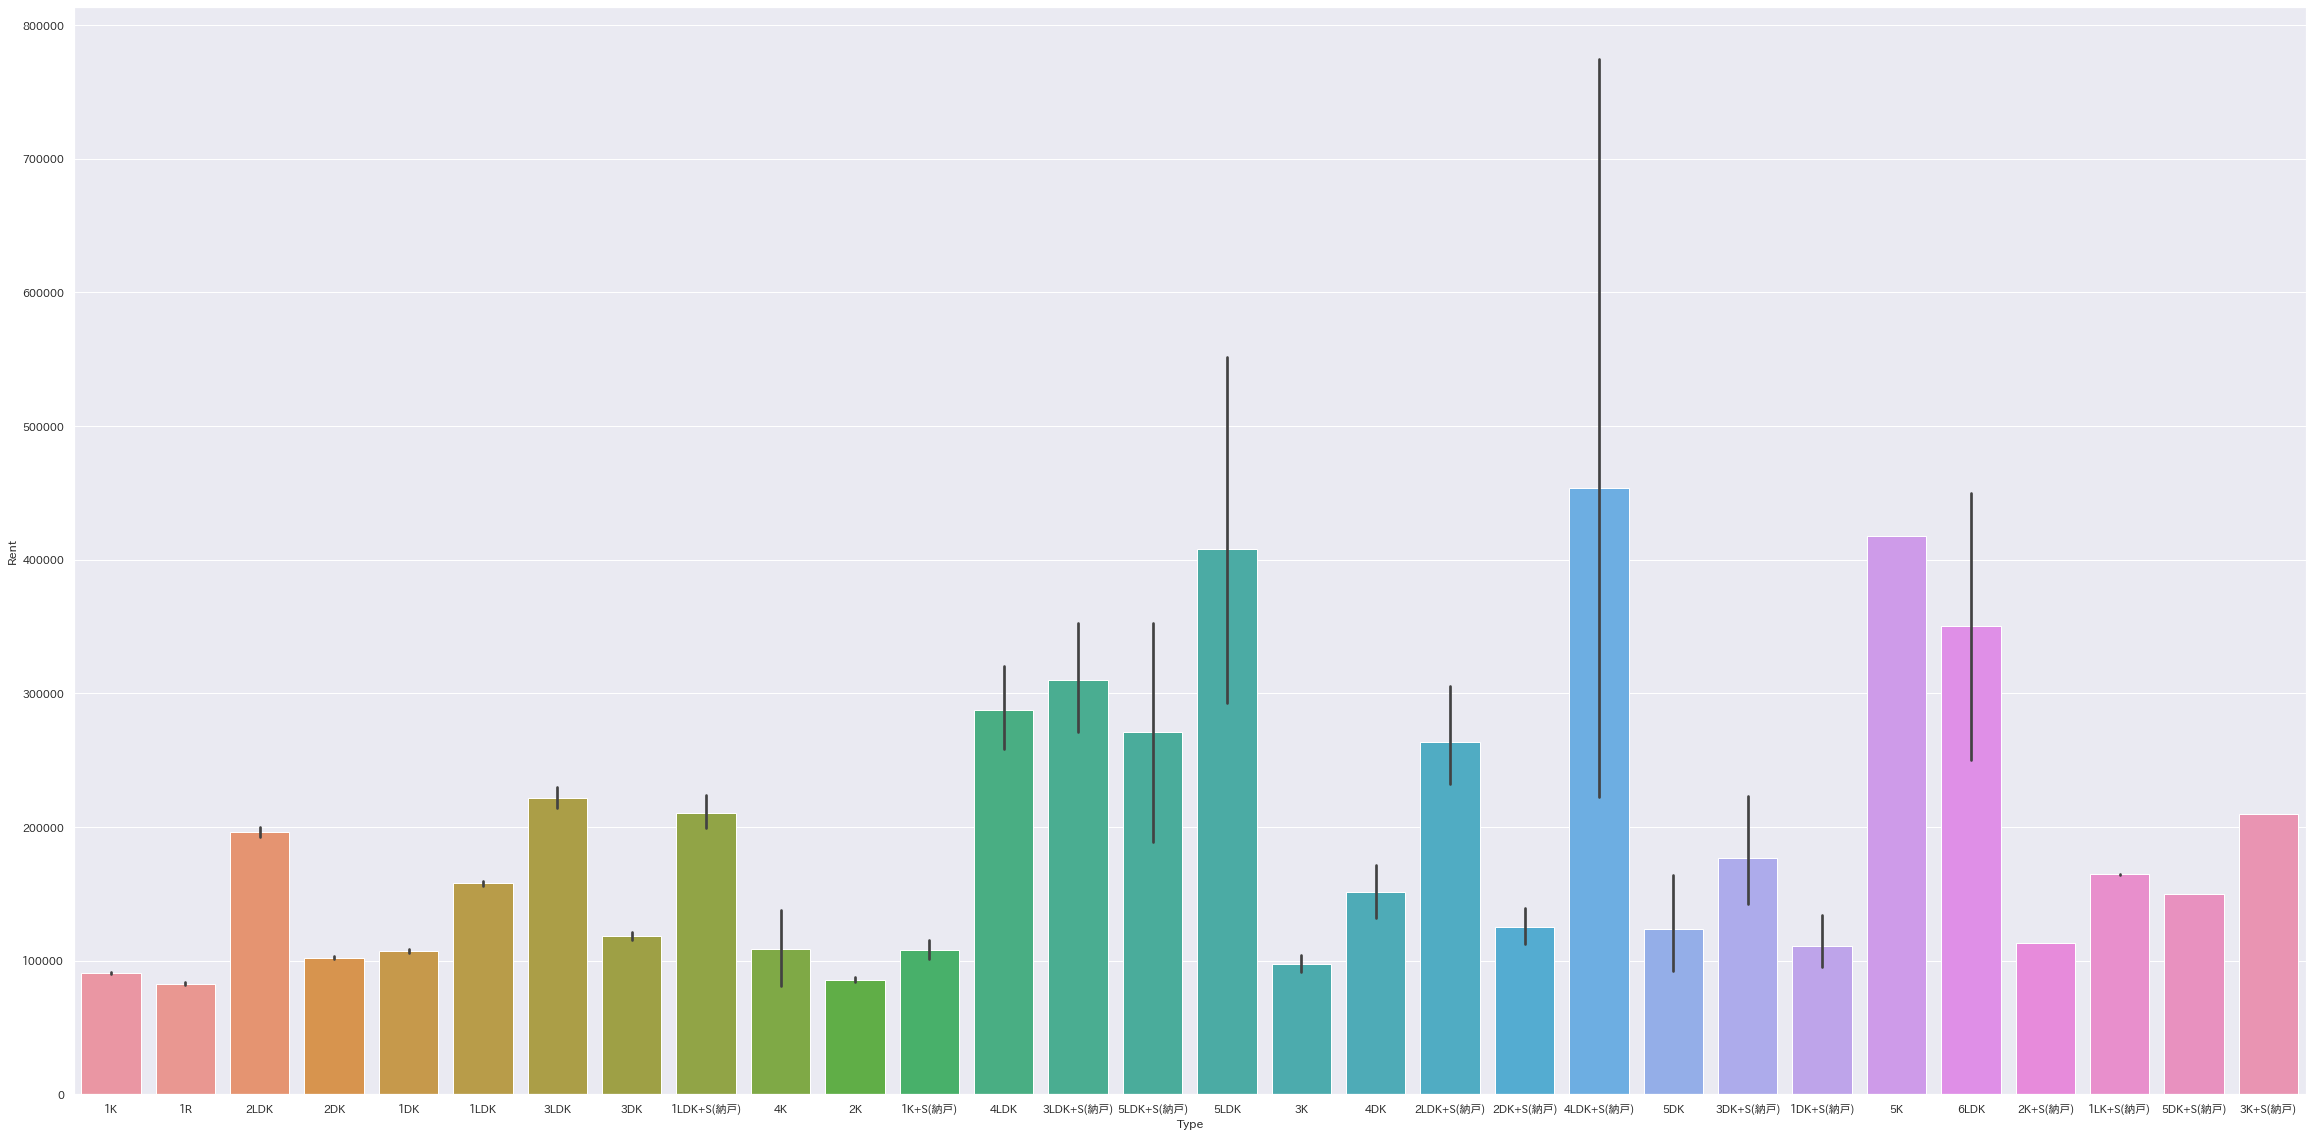

In [508]:
plt.figure(figsize=(40,20))
sns.barplot(x=train['Type'],y=train['Rent'],data=train)

In [509]:
train['Direction'].value_counts()

南     8909
東     4995
西     4026
南東    3098
南西    3080
北     1966
北西    1326
北東    1321
Name: Direction, dtype: int64

In [510]:
train[['Direction', 'Rent']].groupby(['Direction'], as_index=False).mean().sort_values(by="Rent",ascending=False)


,Direction,Rent
2,北西,135791.875566
4,南東,131210.768238
1,北東,127517.737320
5,南西,126737.894481
0,北,126057.842319
7,西,116873.421510
3,南,114149.718936
6,東,113991.111311


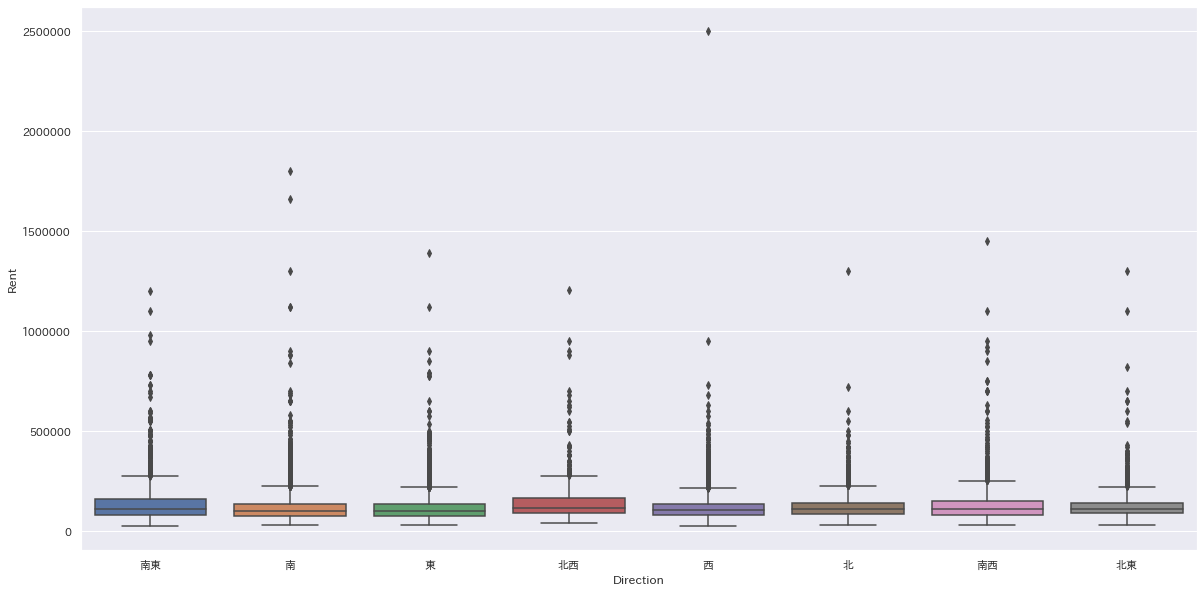

In [511]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train['Direction'],y=train['Rent'],data=train)

In [512]:
for dataset in train_test_data:
    dataset['YearContract'] = dataset['Contract'].str.extract('(^[0-9]*年間)')

In [513]:
train['YearContract'].value_counts()

2年間     23486
5年間       244
3年間       244
1年間       157
4年間        64
6年間         9
10年間        7
7年間         4
22年間        2
15年間        1
12年間        1
Name: YearContract, dtype: int64

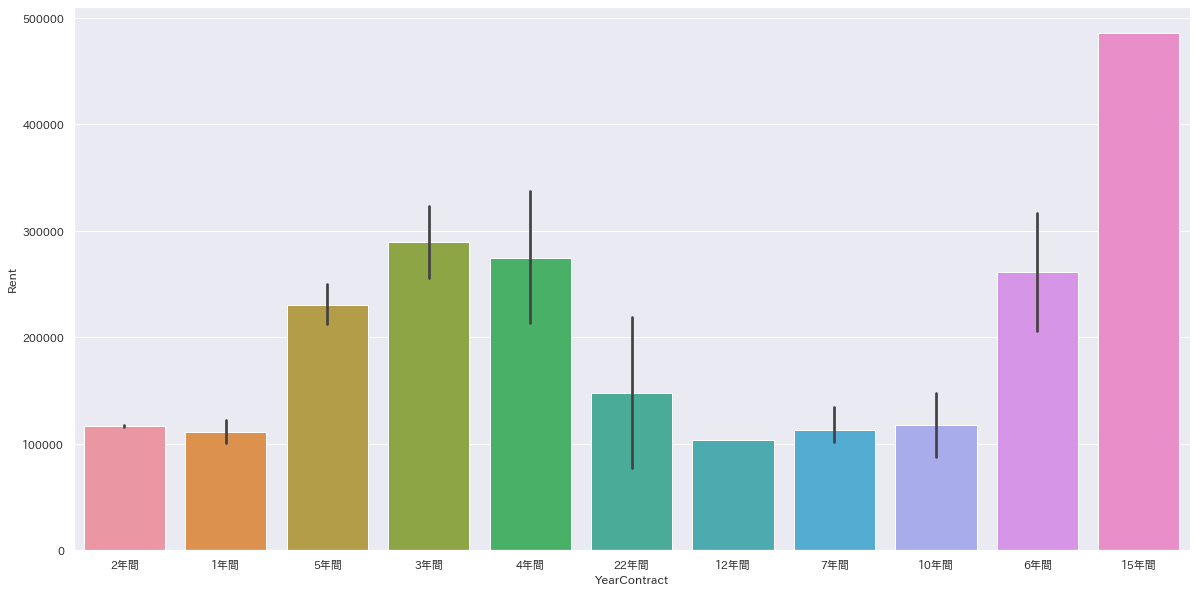

In [514]:
plt.figure(figsize=(20,10))
sns.barplot(x=train['YearContract'],y=train['Rent'],data=train)

In [515]:
for dataset in train_test_data:
    dataset['MonthContract'] = dataset['Contract'].str.extract('(^[0-9]*ヶ月間)')

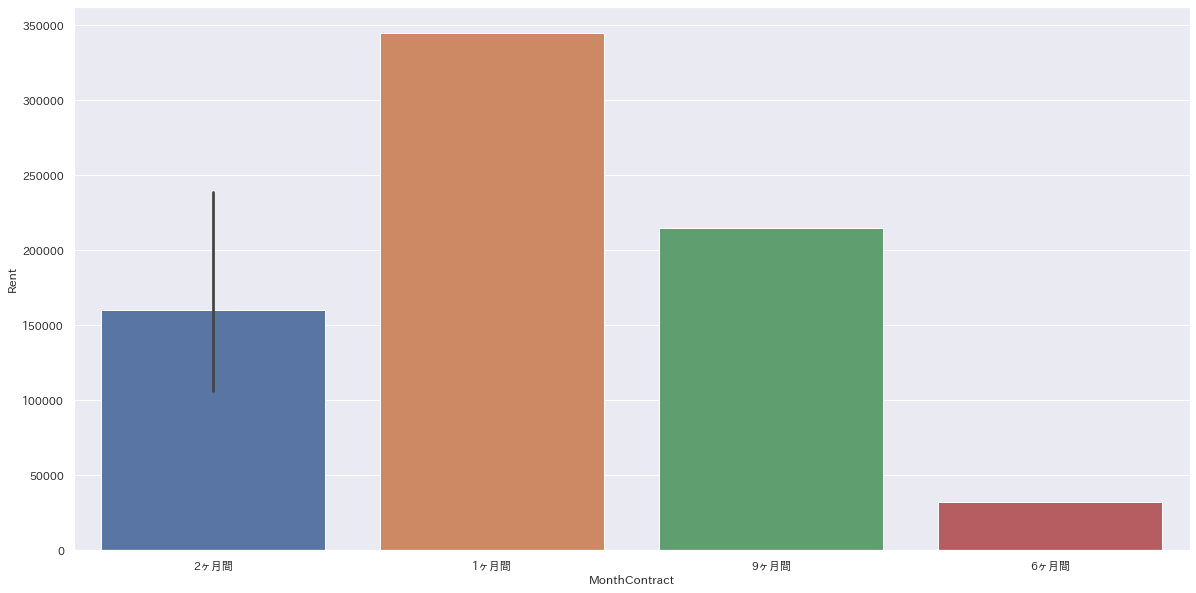

In [516]:
plt.figure(figsize=(20,10))
sns.barplot(x=train['MonthContract'],y=train['Rent'],data=train)

In [517]:
train['MonthContract'].value_counts()

2ヶ月間    11
1ヶ月間     1
6ヶ月間     1
9ヶ月間     1
Name: MonthContract, dtype: int64

In [518]:
train['MonthContract'] = train['MonthContract'].replace(['2ヶ月間','9ヶ月間','6ヶ月間','1ヶ月間'],'0年間')


In [519]:
for dataset in train_test_data:
    dataset['Floorth'] = dataset['Floor'].str.extract('(^[0-9]*階／)')

In [520]:
for dataset in train_test_data:
    dataset['FloorNum'] = dataset['Floor'].str.extract('(^[0-9]*階建)')

In [521]:
train['FloorNum'].value_counts()

2階建    435
3階建    134
1階建      8
4階建      6
5階建      1
Name: FloorNum, dtype: int64

In [522]:
train[['Floorth','Rent']].groupby(['Floorth'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Floorth,Rent
36,43階／,648250.000000
42,50階／,620000.000000
44,53階／,505000.000000
29,37階／,428000.000000
31,39階／,393250.000000
35,42階／,384285.714286
28,36階／,379600.000000
30,38階／,376812.500000
34,41階／,330000.000000
19,28階／,327066.666667


In [523]:
train.drop(['FloorNum','Floor','Contract','Location','MonthContract','Type'],axis=1,inplace=True)

In [524]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 21 columns):
id              31470 non-null int64
Rent            31470 non-null int64
Access          31470 non-null object
Age             31470 non-null object
Direction       28721 non-null object
Area            31470 non-null object
Bath            31141 non-null object
Kitchen         30849 non-null object
Internet        28030 non-null object
Facility        31388 non-null object
Parking         26183 non-null object
Surround        22038 non-null object
Material        31470 non-null object
City            31470 non-null object
R               31470 non-null object
K               31470 non-null bool
L               31470 non-null bool
D               31470 non-null bool
S               31470 non-null bool
YearContract    24219 non-null object
Floorth         30705 non-null object
dtypes: bool(4), int64(2), object(15)
memory usage: 4.2+ MB


In [ ]:
for dataset in train_test_data:
    dataset['Station'] = dataset['Access'].str.extract('(([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF])*駅)')

In [526]:
train['Station'].value_counts()

町    2643
橋    1591
谷     965
前     950
山     877
     ... 
市       9
束       8
路       4
切       2
口       1
Name: Station, Length: 127, dtype: int64

In [527]:
train[['Station','Rent']].groupby(['Station'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)


,Station,Rent
86,留,282538.461538
120,門,275621.359223
40,尾,253283.653846
87,番,244376.284153
67,森,244346.153846
122,附,234395.833333
116,道,228577.777778
49,巳,218235.294118
2,ド,217800.000000
0,き,216122.994652


In [528]:
for dataset in train_test_data:
    dataset['Minute'] = dataset['Access'].str.extract('(徒歩[0-9]*分)')

In [529]:
train['Minute'].value_counts()

徒歩5分     3859
徒歩8分     2820
徒歩3分     2760
徒歩4分     2715
徒歩7分     2706
徒歩6分     2639
徒歩10分    2562
徒歩9分     2168
徒歩2分     1807
徒歩12分    1175
徒歩1分     1112
徒歩11分     999
徒歩13分     927
徒歩15分     862
徒歩14分     670
徒歩17分     304
徒歩18分     280
徒歩16分     263
徒歩20分     199
徒歩19分     160
徒歩23分      82
徒歩22分      82
徒歩21分      72
徒歩25分      59
徒歩24分      41
徒歩27分      32
徒歩26分      29
徒歩29分      28
徒歩28分      27
徒歩32分       6
徒歩30分       5
徒歩33分       4
徒歩38分       4
徒歩37分       4
徒歩36分       2
徒歩34分       2
徒歩45分       1
徒歩39分       1
徒歩42分       1
徒歩31分       1
Name: Minute, dtype: int64

In [530]:
train[['Minute','Rent']].groupby(['Minute'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Minute,Rent
10,徒歩1分,133140.359712
21,徒歩2分,129289.728832
31,徒歩3分,126990.969928
35,徒歩5分,126507.136564
34,徒歩4分,125807.425414
36,徒歩6分,125109.245926
38,徒歩8分,120992.301773
39,徒歩9分,115518.258303
37,徒歩7分,114301.947524
2,徒歩12分,112107.297872


In [531]:
train[['Station','Minute','Rent']].groupby(['Station','Minute'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Station,Minute,Rent
1301,番,徒歩9分,500750.000000
1794,門,徒歩5分,432583.333333
1028,毛,徒歩15分,414666.666667
601,尾,徒歩5分,407375.000000
548,宿,徒歩2分,403750.000000
587,寿,徒歩6分,401866.666667
1689,足,徒歩4分,400000.000000
365,坂,徒歩2分,390352.941176
997,森,徒歩3分,385000.000000
1300,番,徒歩8分,372923.076923


In [532]:
for dataset in train_test_data:
    dataset['Minute'] = dataset['Minute'].str.extract('([0-9]*)')

In [533]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 23 columns):
id              31470 non-null int64
Rent            31470 non-null int64
Access          31470 non-null object
Age             31470 non-null object
Direction       28721 non-null object
Area            31470 non-null object
Bath            31141 non-null object
Kitchen         30849 non-null object
Internet        28030 non-null object
Facility        31388 non-null object
Parking         26183 non-null object
Surround        22038 non-null object
Material        31470 non-null object
City            31470 non-null object
R               31470 non-null object
K               31470 non-null bool
L               31470 non-null bool
D               31470 non-null bool
S               31470 non-null bool
YearContract    24219 non-null object
Floorth         30705 non-null object
Station         27663 non-null object
Minute          31470 non-null object
dtypes: bool(4), int64(2), 

In [534]:
def makeCountFull(train, test, categorical_features=None, report=True):
    add_cols = categorical_features
    if report:
        print('add_cols: ', add_cols)
    for add_col in add_cols:
        train[add_col + '_int'] = train[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
        test[add_col + '_int'] = test[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
    return train, test

In [535]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['R','Access','Age', 'Direction', 'Area', 'Bath', 'Kitchen', 'Internet', 'Facility', 'Parking', 'Surround', 'Material','City','YearContract','Floorth','Minute','Station']
train, test = makeCountFull(train, test, cat_features)
cat_cols = ['R','Access','Age', 'Direction', 'Area', 'Bath', 'Kitchen', 'Internet', 'Facility', 'Parking', 'Surround', 'Material','City','YearContract','Floorth','Minute','Station']
for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    le = LabelEncoder()
    le.fit(list(train[col])+list(test[col]))
    train[col] = le.transform(train[col])
    test[col]    = le.transform(test[col])    
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

add_cols:  ['R', 'Access', 'Age', 'Direction', 'Area', 'Bath', 'Kitchen', 'Internet', 'Facility', 'Parking', 'Surround', 'Material', 'City', 'YearContract', 'Floorth', 'Minute', 'Station']


In [536]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 40 columns):
id                  31470 non-null int64
Rent                31470 non-null int64
Access              31470 non-null category
Age                 31470 non-null category
Direction           31470 non-null category
Area                31470 non-null category
Bath                31470 non-null category
Kitchen             31470 non-null category
Internet            31470 non-null category
Facility            31470 non-null category
Parking             31470 non-null category
Surround            31470 non-null category
Material            31470 non-null category
City                31470 non-null category
R                   31470 non-null category
K                   31470 non-null bool
L                   31470 non-null bool
D                   31470 non-null bool
S                   31470 non-null bool
YearContract        31470 non-null category
Floorth             31470 non-nul

In [537]:
train.drop(["Access","Age", "Direction", "Area", "Bath", "Kitchen", "Internet", 
            "Facility", "Parking", "Surround", "Material","City","YearContract","Floorth","Minute","Station","R"],axis=1,inplace=True)

In [538]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 23 columns):
id                  31470 non-null int64
Rent                31470 non-null int64
K                   31470 non-null bool
L                   31470 non-null bool
D                   31470 non-null bool
S                   31470 non-null bool
R_int               31470 non-null int64
Access_int          31470 non-null int64
Age_int             31470 non-null int64
Direction_int       31470 non-null int64
Area_int            31470 non-null int64
Bath_int            31470 non-null int64
Kitchen_int         31470 non-null int64
Internet_int        31470 non-null int64
Facility_int        31470 non-null int64
Parking_int         31470 non-null int64
Surround_int        31470 non-null int64
Material_int        31470 non-null int64
City_int            31470 non-null int64
YearContract_int    31470 non-null int64
Floorth_int         31470 non-null int64
Minute_int          31470 non-null

In [539]:
test.drop(["Access","Age", "Direction", "Area", "Bath", "Kitchen", "Internet", 
            "Facility", "Parking", "Surround", "Material","City","YearContract","Floorth","Minute","Station","R"],axis=1,inplace=True)

In [540]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 28 columns):
id                  31262 non-null int64
Location            31262 non-null object
Type                31262 non-null object
Floor               31261 non-null object
Contract            24281 non-null object
K                   26165 non-null object
L                   9236 non-null object
D                   13419 non-null object
S                   596 non-null object
MonthContract       13 non-null object
FloorNum            632 non-null object
R_int               31262 non-null int64
Access_int          31262 non-null int64
Age_int             31262 non-null int64
Direction_int       31262 non-null int64
Area_int            31262 non-null int64
Bath_int            31262 non-null int64
Kitchen_int         31262 non-null int64
Internet_int        31262 non-null int64
Facility_int        31262 non-null int64
Parking_int         31262 non-null int64
Surround_int        31262 no

In [541]:
test.drop(["Location","Type","Floor","Contract","FloorNum","MonthContract"],axis=1,inplace=True)


In [542]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 22 columns):
id                  31262 non-null int64
K                   26165 non-null object
L                   9236 non-null object
D                   13419 non-null object
S                   596 non-null object
R_int               31262 non-null int64
Access_int          31262 non-null int64
Age_int             31262 non-null int64
Direction_int       31262 non-null int64
Area_int            31262 non-null int64
Bath_int            31262 non-null int64
Kitchen_int         31262 non-null int64
Internet_int        31262 non-null int64
Facility_int        31262 non-null int64
Parking_int         31262 non-null int64
Surround_int        31262 non-null int64
Material_int        31262 non-null int64
City_int            31262 non-null int64
YearContract_int    31262 non-null int64
Floorth_int         31262 non-null int64
Minute_int          31262 non-null int64
Station_int         31262 non

In [543]:
test['K'] = test['K'].apply(lambda x: True if x == 'K' else False)
test['D'] = test['D'].apply(lambda x: True if x == 'D' else False)
test['L'] = test['L'].apply(lambda x: True if x == 'L' else False)
test['S'] = test['S'].apply(lambda x: True if x == 'S' else False)


In [544]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 22 columns):
id                  31262 non-null int64
K                   31262 non-null bool
L                   31262 non-null bool
D                   31262 non-null bool
S                   31262 non-null bool
R_int               31262 non-null int64
Access_int          31262 non-null int64
Age_int             31262 non-null int64
Direction_int       31262 non-null int64
Area_int            31262 non-null int64
Bath_int            31262 non-null int64
Kitchen_int         31262 non-null int64
Internet_int        31262 non-null int64
Facility_int        31262 non-null int64
Parking_int         31262 non-null int64
Surround_int        31262 non-null int64
Material_int        31262 non-null int64
City_int            31262 non-null int64
YearContract_int    31262 non-null int64
Floorth_int         31262 non-null int64
Minute_int          31262 non-null int64
Station_int         31262 non-null

In [545]:
X = train.drop(['id', 'Rent'], axis=1)
y = train['Rent']
X_test = test.drop(['id'], axis=1)

In [546]:
y_pred = np.zeros(X_test.shape[0], dtype='float32')
train_pred = np.zeros(X.shape[0], dtype='float32')

cv_score = 0
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 255,
    'max_bin': 55,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'nthread': -1,
    'bagging_freq': 1,
    'verbose': -1,
    'seed': 1,
    'n_estimators':720,
    'bagging_fraction': 0.8,
    'bagging_fre' : 5,
}
model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
                  num_boost_round=5000, early_stopping_rounds=200,
                  verbose_eval=200)

y_val_pred = model.predict(X_valid)
val_score = np.sqrt(mean_squared_error(y_valid, y_val_pred))
print('RMSE:', val_score)

y_pred += model.predict(X_test, num_iteration=model.best_iteration)

c:\users\anhnq\.virtualenvs\project\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 31939.5	valid_1's rmse: 39057.4
[400]	training's rmse: 24320.6	valid_1's rmse: 35534.7
[600]	training's rmse: 20427.5	valid_1's rmse: 34436.1
Did not meet early stopping. Best iteration is:
[720]	training's rmse: 18673.3	valid_1's rmse: 34107.4
RMSE: 34107.388104645506


In [547]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = model.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances

,feature,importance
16,City_int,21548
8,Area_int,18103
20,Station_int,17161
6,Age_int,16681
9,Bath_int,15173
10,Kitchen_int,13661
12,Facility_int,12415
18,Floorth_int,10802
13,Parking_int,10518
11,Internet_int,10288


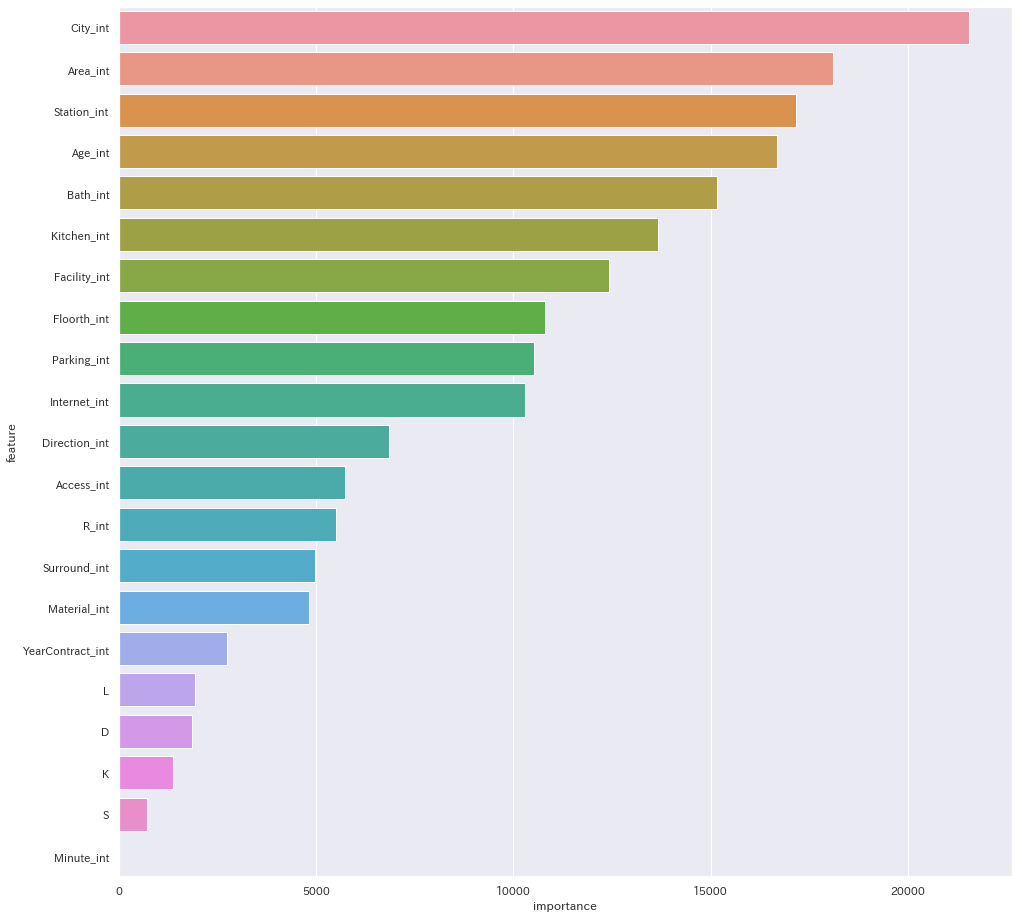

In [548]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.head(50), x='importance', y='feature')

In [549]:
submit = pd.read_csv('sample_submit.csv', names=('id', 'Rent'))


In [550]:
submit['Rent'] = y_pred
submit.head(10)
submit.to_csv('submission.csv', header=False, index=False)